# Analysis of products on Wish platform

Description:
This is data about various products listed on e-commerce platform "Wish", based on the search results with a keyword "summer". Data was collected during early August 2020.

Link: https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish

Original dataset contains 1573 rows × 43 columns.

This dataset contains columns such as product title, product price, product mean rating, number of given ratings, info whether a product has express shipment, different badges awarded by buyers to a product when rating it (such as product quality, fast shipping, local product), info about the product (such as color and size, origin country), merchant rating, product id and more.

Not all the columns will be used for the analysis, however, here is brief explanation of the columns:

- **title:**                            French Title of the product
- **title_orig:**                       Original english title of the product
- **price:**                            Current price of the product
- **retail_price:**                     Price before/reference price for similar articles in other stores/places
- **currency_buyer:**                   Currency - all are in EUR
- **units_sold:**                       Nr. of customers that bought item as stated on website (not equivalent to nr units sold) 
- **uses_ad_boosts:**                   Whether the seller paid to boost his product to be highlighted or positioned higher
- **rating:**                           Mean product rating from customers
- **rating_count:**                     Total number of ratings of the product left by buyers
- **rating_five_count:**                Number of 5-star ratings
- **rating_four_count:**                Number of 4-star ratings
- **rating_three_count:**               Number of 3-star ratings
- **rating_two_count:**                 Number of 2-star ratings
- **rating_one_count:**                 Number of 1-star ratings
- **badges_count:**                     Number of badges the product or the seller have
- **badge_local_product:**              Has a badge denoting that item is locally made (1 - yes, 0 - no)
- **badge_product_quality:**            Has a Badge awarded when many buyers consistently gave good evaluations (1 - yes, 0 - no)
- **badge_fast_shipping:**              Has a Badge awarded when this product's order is consistently shipped rapidly (1 - yes, 0 - no)
- **tags:**                             Tags for an item that seller has set
- **product_color:**                    Product's color (only color on the front)
- **product_variation_size_id:**        One of the available size variation for this product (not all the sizes are shown)
- **product_variation_inventory:**      Inventory the seller has. Max allowed quantity is 50 (not the actual availability of the product)
- **shipping_option_name:**             Name of shipping company (Mostly only 1 shipper's name)
- **shipping_option_price:**            shipping price, EUR.
- **shipping_is_express:**              Has express shipping (1 - yes, 0 - no)
- **countries_shipped_to:**             Number of countries this product is shipped to.
- **inventory_total:**                  Supposed to have nr of items available, but does not make sense 
- **has_urgency_banner:**               Has an urgency banner prompting customers to buy (1 - yes, or empty)
- **urgency_text:**                     Text of the urgency banner prompting to buy (1 - yes, or empty)
- **origin_country:**                   Abbreviation of country if origin
- **merchant_title:**                   Merchant's displayed name (show in the UI as the seller's shop name)
- **merchant_name:**                    Merchant's canonical name, not shown publicly. Used by the website.
- **merchant_info_subtitle:**           The subtitle text as shown on a seller's info section to the user.
- **merchant_rating_count:**            Total number of ratings of the merchant left by buyers
- **merchant_rating:**                  Mean seller's rating from costomers
- **merchant_id:**                      Merchant unique id
- **merchant_has_profile_picture:**     Whether merchant has a profice picture (1 - yes, 0 - no) 
- **merchant_profile_picture:**         URL with merchant's profile picture (otherwise empty) 
- **product_url:**                      URL to the product page. 
- **product_picture:**                  URL to the product picture.
- **product_id:**                       product identifier.
- **theme:**                            Keyword used to search ("Summer" in all cells)    

## Main Questions:

# 1. What factors have influence on rating of a product?
#### 2. If product has badges awarded - how does it influence rating?
#### 3. If the seller uses ad boosts and urgency banners - does it influence rating?
#### 4. Does shipping factor (number of countries shipped to, price of shipping) affect the rating?
#### 5. How many products with different ratings are there? Proportion of higher ratings?

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


In [7]:
df = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")


In [8]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [9]:
pd.set_option('display.max_columns', None)

# 1. Preparing data

In [10]:
df.duplicated().any()

True

In [11]:
df = df.drop_duplicates()
# Removed the duplicates

In [12]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 43
rating_four_count                 43
rating_three_count                43
rating_two_count                  43
rating_one_count                  43
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

### 1.1. Removing columns that do not have any significance for this analysis:
As we have very many columns, we could to remove some of them as they:
- have **string values** thoughout the column that **cannot be analyzed** (same value in all cells, URLs, multiple unsorted string values, etc. 
- have **integer values** that have **no any meaning** (faulty data scraping)

**title':** same as "title_orig", but in French

**'currency_buyer':** same string value 'EUR'

**'tags':** multiple unsorted string values in one cell

**'product_variation_size_id':** provides just one of the available sizes iof an item: cannot analyze

**'product_variation_inventory':** integer value that cannot be analyzed (faulty data scraping)

**'shipping_option_name':** same string value thoughout most cells, no significance

**'inventory_total':** integer value that cannot be analyzed (faulty data scraping)

**'urgency_text':** multiple unsorted string values in one cell

**'merchant_name':** same info as in "merchant title" column

**'merchant_info_subtitle':** unusable string data

**'merchant_profile_picture':** unusable string data

**'product_url':** URL — unusable string data

**'product_picture' :** unusable string data

**'theme' :** same string value 'summer' in all cells

**'crawl_month':** same date in all cells

In [13]:
df = df.drop(['title', 'currency_buyer', 'tags', 'product_variation_size_id', 'product_variation_inventory',
         'shipping_option_name', 'inventory_total', 'urgency_text', 'merchant_name', 'merchant_info_subtitle',
        'merchant_profile_picture', 'product_url', 'product_picture', 'theme', 'crawl_month'], axis = 1)

In [14]:
df.head()

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,shipping_option_price,shipping_is_express,countries_shipped_to,has_urgency_banner,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,white,4,0,34,1.0,CN,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,green,2,0,41,1.0,CN,SaraHouse,17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,leopardprint,3,0,36,1.0,CN,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,black,2,0,41,NaN,CN,allenfan,23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,yellow,1,0,35,1.0,CN,youngpeopleshop,14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70


### 1.2. Filling in empty values

In [15]:
df.isnull().sum()

title_orig                         0
price                              0
retail_price                       0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 43
rating_four_count                 43
rating_three_count                43
rating_two_count                  43
rating_one_count                  43
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
product_color                     41
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
has_urgency_banner              1071
origin_country                    16
merchant_title                     0
merchant_rating_count              0
merchant_rating                    0
merchant_id                        0
merchant_has_profile_picture       0
p

In [16]:
df['rating_five_count'] = df['rating_five_count'].fillna(0)

In [17]:
df['rating_four_count'] = df['rating_four_count'].fillna(0)

In [18]:
df['rating_three_count'] = df['rating_three_count'].fillna(0)

In [19]:
df['rating_two_count'] = df['rating_two_count'].fillna(0)

In [20]:
df['rating_one_count'] = df['rating_one_count'].fillna(0)

In [21]:
df['product_color'].unique()

array(['white', 'green', 'leopardprint', 'black', 'yellow', 'navyblue',
       'blue', 'beige', 'grey', 'lightblue', 'orange', 'red', 'Black',
       'armygreen', nan, 'pink', 'khaki', 'red & blue', 'blue & pink',
       'RED', 'white & green', 'winered', 'black & green', 'purple',
       'whitefloral', 'floral', 'fluorescentgreen', 'orange & camouflage',
       'lightyellow', 'coolblack', 'multicolor', 'camouflage',
       'lightpink', 'pink & black', 'silver', 'Army green', 'lightgreen',
       'mintgreen', 'pink & grey', 'gray', 'coffee', 'rose',
       'light green', 'leopard', 'black & white', 'orange-red',
       'dustypink', 'White', 'star', 'white & black', 'apricot',
       'skyblue', 'burgundy', 'claret', 'pink & white', 'rosered', 'tan',
       'navy blue', 'wine red', 'lightred', 'Pink', 'coralred', 'brown',
       'lakeblue', 'darkblue', 'camel', 'pink & blue', 'nude', 'Blue',
       'lightpurple', 'army', 'black & stripe', 'Rose red',
       'greysnakeskinprint', 'denimbl

In [22]:
df['product_color'] = df['product_color'].str.lower()

In [23]:
print(df.groupby('product_color')['product_id'].nunique().sort_values(0, ascending=False))

product_color
black               267
white               209
pink                 86
blue                 85
yellow               80
                   ... 
lightred              1
navyblue & white      1
nude                  1
offblack              1
lightkhaki            1
Name: product_id, Length: 95, dtype: int64


C:\Users\justj\AppData\Local\Temp/ipykernel_13948/1485856293.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  print(df.groupby('product_color')['product_id'].nunique().sort_values(0, ascending=False))


In [24]:
df['product_color'] = df['product_color'].fillna('other')

In [25]:
df['has_urgency_banner'] = df['has_urgency_banner'].fillna(0)

In [26]:
df['origin_country'].unique()

array(['CN', 'US', nan, 'VE', 'AT', 'SG', 'GB'], dtype=object)

In [27]:
df['origin_country'] = df['origin_country'].fillna('OTHER')

In [28]:
df.dtypes

title_orig                       object
price                           float64
retail_price                      int64
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
product_color                    object
shipping_option_price             int64
shipping_is_express               int64
countries_shipped_to              int64
has_urgency_banner              float64
origin_country                   object
merchant_title                   object
merchant_rating_count             int64
merchant_rating                 float64


# 2. Data Exploration

In [29]:
df.describe().round(2) # Min Possible Rating = 1.00, Max Possible Rating = 5.00

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,shipping_option_price,shipping_is_express,countries_shipped_to,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00
mean,8.36,23.32,4422.48,0.44,3.82,907.37,438.14,177.92,133.32,63.13,94.85,0.11,0.02,0.07,0.01,2.36,0.00,40.45,0.30,26772.09,4.03,0.15
std,3.94,30.31,9438.32,0.50,0.51,2001.72,977.60,399.44,310.84,150.93,213.52,0.34,0.14,0.26,0.11,1.03,0.05,20.14,0.46,79191.41,0.20,0.35
min,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,6.00,0.00,0.00,2.33,0.00
25%,5.82,7.00,100.00,0.00,3.55,26.00,11.00,4.50,4.00,2.00,3.00,0.00,0.00,0.00,0.00,2.00,0.00,31.00,0.00,2052.50,3.92,0.00
50%,8.00,10.00,1000.00,0.00,3.85,161.00,77.00,30.00,23.00,11.00,19.00,0.00,0.00,0.00,0.00,2.00,0.00,40.00,0.00,8197.00,4.05,0.00
75%,11.00,26.00,5000.00,1.00,4.11,873.00,401.00,167.00,126.50,61.00,91.50,0.00,0.00,0.00,0.00,3.00,0.00,43.00,1.00,24564.00,4.17,0.00
max,49.00,252.00,100000.00,1.00,5.00,20744.00,11548.00,4152.00,3658.00,2003.00,2789.00,3.00,1.00,1.00,1.00,12.00,1.00,140.00,1.00,2174765.00,5.00,1.00


In [30]:
# Product with the highest rating count:

print(df.loc[df['rating_count'] == df['rating_count'].max(), ['title_orig', 'rating_count', 'rating']])

                                           title_orig  rating_count  rating
92  Women Stretchy Camisole Spaghetti Strap Long T...         20744     4.1


In [31]:
# Product with the lowest rating count:
df.loc[df['rating_count'] == df['rating_count'].min(), 'product_id']

74      5ed0dfc51fa8446451b19c0d
112     5eb90ab5ad67f63678d15ed9
126     5ed3ae8e7bf8821d5cf4bc64
189     5ed1c059630f990d1d44592c
216     573db9316b335c34ca0513b8
248     5e8d70549f1504449514c8b9
309     5edda5aeb7160e568443c6e7
346     5eccb8aa18e87d64f13e012c
348     5ebfdd5bebac37702b0b207b
375     5ec48b4f504db2c516aad131
438     5f01c514792d0b94d29d0cb6
481     5e86c978d4bc413d5735e5ea
487     5ea7e2d949b52108c6560c5b
555     5f03643cc00703c46d6745f0
597     5ee4389b9d2ddf161dcb50c7
618     5ed1c059630f990d1d44592c
634     5eb4dccc8fb578171beef0ad
670     5eb618659ac3e01e76161a4a
732     5eccb8aa18e87d64f13e012c
746     5eb2200b989caa081980b812
774     5f11698e9a44cd5ecd1909db
781     5ed4cabd34f3329741e8c3ee
864     5e79d1d09981e55d65627085
865     5edf2eac07570835cf35ee02
904     5ed48479a79b693eae66e575
959     5ed4846f86ab3a200059da35
976     5eb8dd6275e01b65b8da16ac
1094    5eb4dc8ec1231404c92d7eae
1117    5ed48479a79b693eae66e575
1127    5e9a99189b1c2d0240f15f72
1148    5f

In [32]:
df.loc[[74, 346, 1355], ['rating', 'rating_count']]

,rating,rating_count
74,5.0,0
346,5.0,0
1355,5.0,0


- **How can be that rating = 5, when rating_count = 0 (no any rating given)?** 

In [33]:
filter1 = df['rating'] == 5
filter2 = df['rating_count'] == 0
# 45 Products have rating '5' without rating count
df.loc[filter1 & filter2, 'product_id'].count()

43

As it is explained in the description of dataset: some products with **5-star ratings and 0 rating_count**, as the website sometimes **provides 5 stars by default** to give a boost and showcast new products in the search results.

In [34]:
# Check if other ratings have rating_count = 0
filter3 = df['rating'] != 0
filter2 = df['rating_count'] == 0
df.loc[filter3 & filter2, 'product_id'].count() # Only 43 products (i.e. with 5-star ratings) have this issue

43

- Only 43 products (i.e. with 5-star ratings) have this issue

In [35]:
df.loc[df['rating'] == 5, 'product_id'].count() # Total number of products with 5-star rating

65

**43** out of **65** 5-star ratings have 0 in rating_count, that is the largest part of 5-star ratings.

After trying different options, I decided to **delete the rows** with this inconsistency, 
as it may affect the analysis and show weaker relationships and dependencies.


In [36]:
df = df.drop(df[(df['rating'] == 5) & (df['rating_count'] == 0)].index)

- now dataframe has 1496 rows × 28 columns (43 rows less)

In [37]:
filter3 = df['rating'] != 0
filter2 = df['rating_count'] == 0
df.loc[filter3 & filter2, 'product_id'].count()

0

In [38]:
# Proportion of different ratings across all the products

print("Ratings '5':", (df['rating'] == 5).mean().round(4) * 100, "% Count", (df['rating'] == 5).sum())
print("Ratings '4 — 4.99':", ((df['rating'] < 5) & (df['rating'] >= 4)).mean().round(4) * 100, "% Count", 
      ((df['rating'] < 5) & (df['rating'] >= 4)).sum())
print("Ratings '3 — 3.99':", ((df['rating'] >= 3) & (df['rating'] < 4)).mean().round(4) * 100, "% Count", 
      ((df['rating'] >= 3) & (df['rating'] < 4)).sum())
print("Ratings '2 — 2.99':", ((df['rating'] >= 2) & (df['rating'] < 3)).mean().round(4) * 100, "% Count", 
      ((df['rating'] >= 2) & (df['rating'] < 3)).sum())
print("Ratings '1 — 1.99':", ((df['rating'] >= 1) & (df['rating'] < 2)).mean().round(4) * 100, "% Count", 
      ((df['rating'] >= 1) & (df['rating'] < 2)).sum())

Ratings '5': 1.47 % Count 22
Ratings '4 — 4.99': 34.69 % Count 519
Ratings '3 — 3.99': 59.63 % Count 892
Ratings '2 — 2.99': 3.88 % Count 58
Ratings '1 — 1.99': 0.33 % Count 5


In [39]:
def rating_func(rating):
    if rating == 5:
        return "Rating 5"
    elif (rating < 5) & (rating >= 4):
        return "Rating 4 — 4.99"
    elif (rating >= 3) & (rating < 4):
        return "Rating 3 — 3.99"
    elif (rating >= 2) & (rating < 3):
        return "Rating 2 — 2.99"
    else:
        return "Rating 1 — 1.99"

In [40]:
df['rating_range'] = df['rating'].map(rating_func)

In [41]:
df['rating_range'].value_counts()

Rating 3 — 3.99    892
Rating 4 — 4.99    519
Rating 2 — 2.99     58
Rating 5            22
Rating 1 — 1.99      5
Name: rating_range, dtype: int64

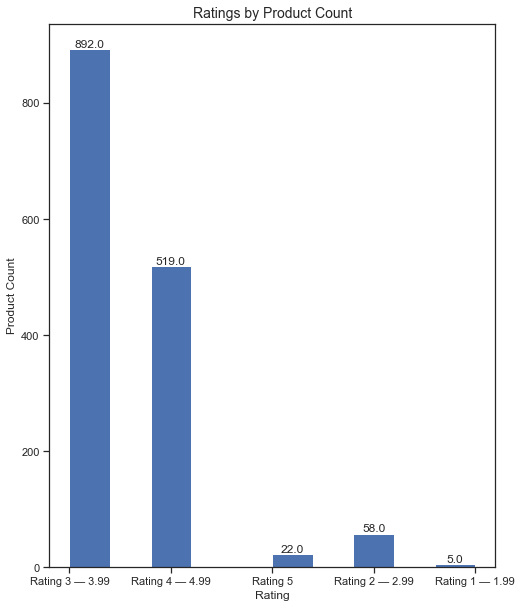

In [135]:
fig, ax = plt.subplots(1,  1, figsize = (8, 10))
counts, edges, bars = plt.hist(df['rating_range'])
ax.set_title("Ratings by Product Count", size = 14)
ax.set_xlabel("Rating",size = 12)
ax.set_ylabel("Product Count", size = 12)
plt.bar_label(bars, labels=[v if v > 0 else '' for v in bars.datavalues]);
plt.savefig('Ratings_by_Prod_Count.png')

In [43]:
df['origin_country'].unique()

array(['CN', 'US', 'OTHER', 'VE', 'SG', 'GB'], dtype=object)

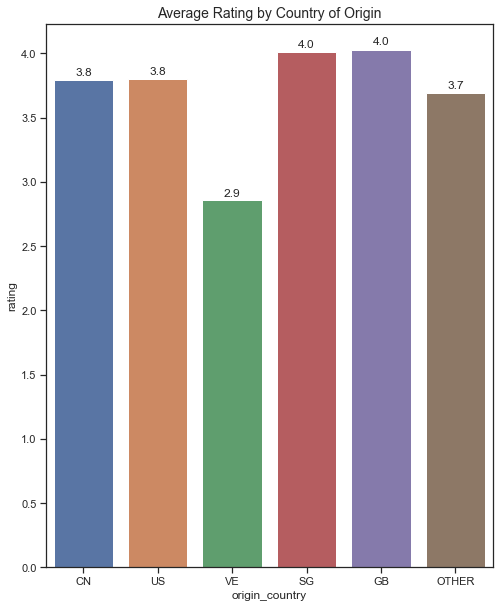

In [148]:
fig, ax1 = plt.subplots(1,  1, figsize = (8, 10))

p = sns.barplot(x = "origin_country", y = "rating", 
                                  data = df, order = ["CN", "US", "VE", "SG", "GB", "OTHER"], 
                                  ci = None)

ax1.set_title("Average Rating by Country of Origin", size = 14)

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
        
show_values(p)
plt.savefig('Avg_Rating_by_Country_Orig.png')

In [45]:
# Average rating for all products

np.round(df['rating'].mean(), 4)

3.789

In [46]:
# items with rating higher than total average
df[df['rating'] > 3.79]['product_id'].count()

802

In [47]:
# % of items with rating higher than total average
print("Portion of items with rating higher than total average:", (df['rating'] > 3.79).mean().round(4) * 100, '%')

Portion of items with rating higher than total average: 53.61 %


# 2.1 Additional Columns and Dataframes

- **We can add a column with a perceived price difference (discount), i.e. Retail Price — Price:**

In [48]:
df['discount'] = df['retail_price'] - df['price']

In [49]:
df['discount']

0       -2.00
1       14.00
2       35.00
3        0.00
4        0.28
        ...  
1568     3.00
1569    54.00
1570    14.00
1571    -2.00
1572    -1.00
Name: discount, Length: 1496, dtype: float64

In [50]:
# items with biggest perceived discount

df.loc[df['discount'] == df['discount'].max(), ['title_orig', 'price', 'retail_price', 
                                                'discount', 'rating', 'rating_count', 'product_id']]

,title_orig,price,retail_price,discount,rating,rating_count,product_id
1349,S-5XL Plus Size Summer Fashion Women Sleeveles...,8.0,252,244.0,3.88,161,5ae978af2d88f95727d921f2


- Since there are very few Products with 5-star ratings (22 out of 1496), we can add a DataFrame with higher ratings: 4- and 5-star ratings

In [51]:
df_high_rating = df[df['rating'] >= 4]

In [52]:
 # Also, let us add a DataFrame with ratings lower than 4
    
df_low_rating = df[df['rating'] < 4]

# 3. Correlation

In [53]:
df.corr()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,shipping_option_price,shipping_is_express,countries_shipped_to,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,discount
price,1.000000,0.311863,-0.031085,-0.081763,0.068447,-0.007158,-0.005845,-0.003440,-0.016521,-0.014374,0.000321,0.068152,0.069669,0.014606,0.088022,0.872807,0.149307,-0.030943,-0.019856,-0.025512,0.033713,0.017748,0.188711
retail_price,0.311863,1.000000,0.012532,-0.029321,0.032821,0.054619,0.053103,0.061391,0.048456,0.045914,0.050998,0.020405,0.022829,0.000653,0.032583,0.269194,-0.010345,0.042827,-0.010752,0.033380,0.066116,0.030273,0.991908
units_sold,-0.031085,0.012532,1.000000,-0.020443,0.075629,0.898470,0.875746,0.890702,0.893889,0.866316,0.832272,0.041530,-0.010679,0.061227,-0.003462,-0.036750,-0.009491,-0.013965,-0.028815,0.274023,0.124931,0.138887,0.017106
uses_ad_boosts,-0.081763,-0.029321,-0.020443,1.000000,-0.052693,-0.048642,-0.048053,-0.048389,-0.045932,-0.048097,-0.044551,0.038789,0.062194,0.001603,0.038539,-0.068618,-0.019404,-0.017912,0.010836,0.026433,-0.034225,0.003066,-0.019380
rating,0.068447,0.032821,0.075629,-0.052693,1.000000,0.091380,0.138916,0.100269,0.045649,0.002396,-0.035152,0.242298,0.015832,0.310956,-0.007118,0.078242,0.030401,0.051173,-0.043122,0.041574,0.285353,0.031506,0.024777
rating_count,-0.007158,0.054619,0.898470,-0.048642,0.091380,1.000000,0.983274,0.995911,0.981422,0.945972,0.911105,0.074310,-0.005341,0.081332,0.042481,-0.010866,-0.002263,-0.001609,-0.008774,0.259185,0.145250,0.151076,0.057409
rating_five_count,-0.005845,0.053103,0.875746,-0.048053,0.138916,0.983274,1.000000,0.981133,0.932404,0.873279,0.828159,0.118185,-0.000674,0.138592,0.036830,-0.005729,0.005095,-0.001077,-0.013400,0.248067,0.168299,0.152487,0.055668
rating_four_count,-0.003440,0.061391,0.890702,-0.048389,0.100269,0.995911,0.981133,1.000000,0.976308,0.932974,0.891560,0.068959,-0.008908,0.078172,0.037936,-0.008764,-0.005550,-0.000557,-0.009637,0.253314,0.147274,0.149227,0.063913
rating_three_count,-0.016521,0.048456,0.893889,-0.045932,0.045649,0.981422,0.932404,0.976308,1.000000,0.984834,0.951991,0.026179,-0.010726,0.021421,0.042290,-0.023236,-0.008879,0.001276,-0.004296,0.265688,0.114461,0.137229,0.052291
rating_two_count,-0.014374,0.045914,0.866316,-0.048097,0.002396,0.945972,0.873279,0.932974,0.984834,1.000000,0.982809,-0.000564,-0.012339,-0.016473,0.051169,-0.023120,-0.011770,-0.001998,0.001460,0.261371,0.094298,0.133704,0.049376


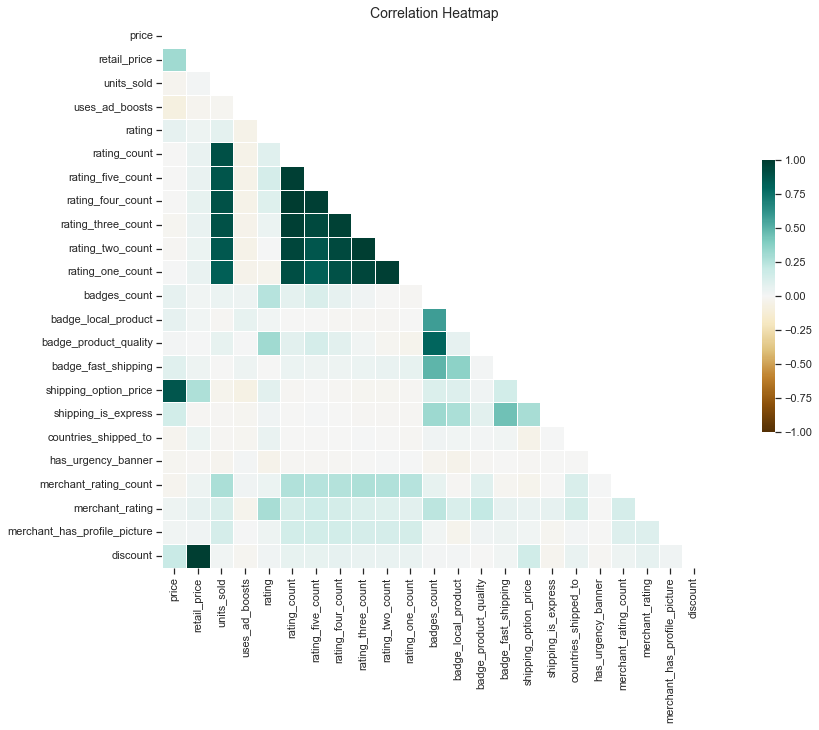

In [144]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(corr, mask=mask, cmap='BrBG', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
plt.title('Correlation Heatmap', fontsize = 14)
plt.savefig('Corr_Heatmap.png')

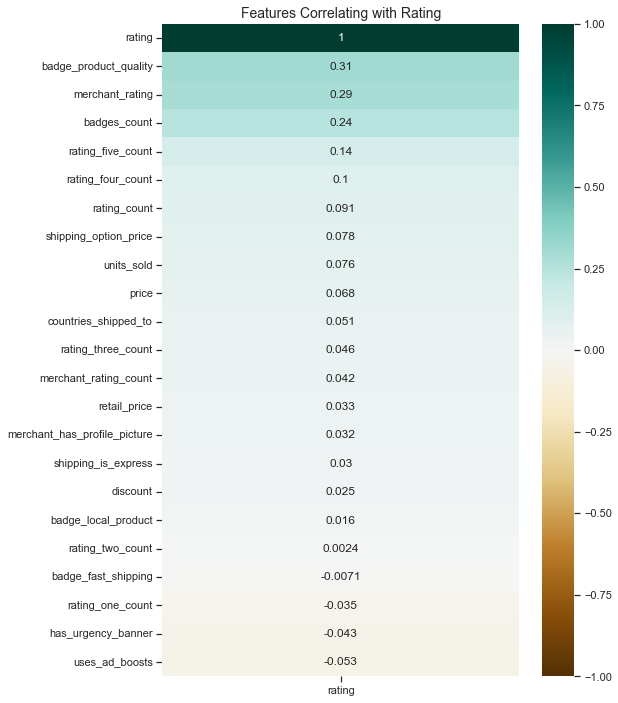

In [138]:
df.corr()[['rating']].sort_values(by='rating', ascending=False)

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['rating']].sort_values(by='rating', ascending=False), 
                      vmin=-1, vmax=1, cmap='BrBG', annot = True)
plt.title('Features Correlating with Rating', fontsize = 14);
plt.savefig('Corr_w_Rating.png')

#### Rating:
We can see a slight positive correlation of **rating** with **badge_product_quality (0.31)**, **merchant_rating (0.29)** and **badges_count (0.24)**.

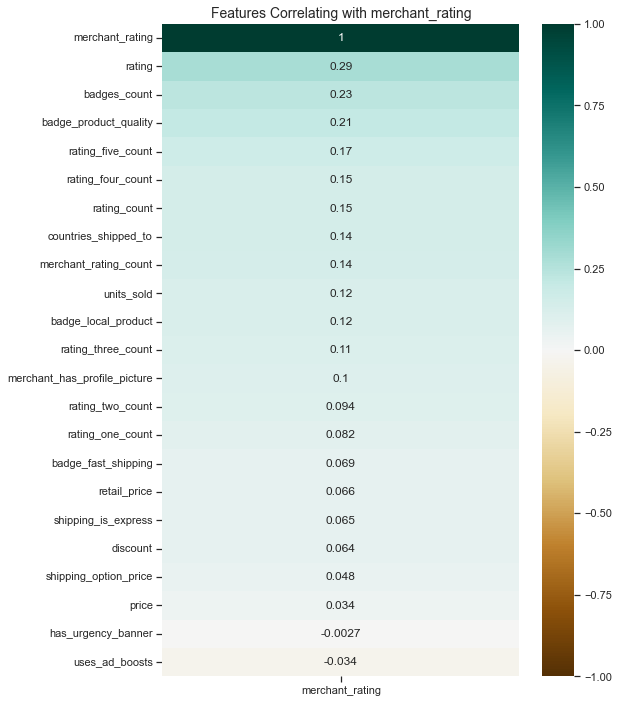

In [139]:
df.corr()[['merchant_rating']].sort_values(by='merchant_rating', ascending=False)

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['merchant_rating']].sort_values(by='merchant_rating', ascending=False), 
                      vmin=-1, vmax=1, cmap='BrBG', annot = True)
plt.title('Features Correlating with merchant_rating', fontsize = 14);
plt.savefig('Corr_merch_rating.png')

#### Merchant_rating:
There is a slight correlation of **merchant rating** with mean **rating (0.28)**, **badge_count (0.23)** and **badge_product_quality (0.2)**

# 4. Analysing Relationships

## 4.1 Relationships of rating with other variables

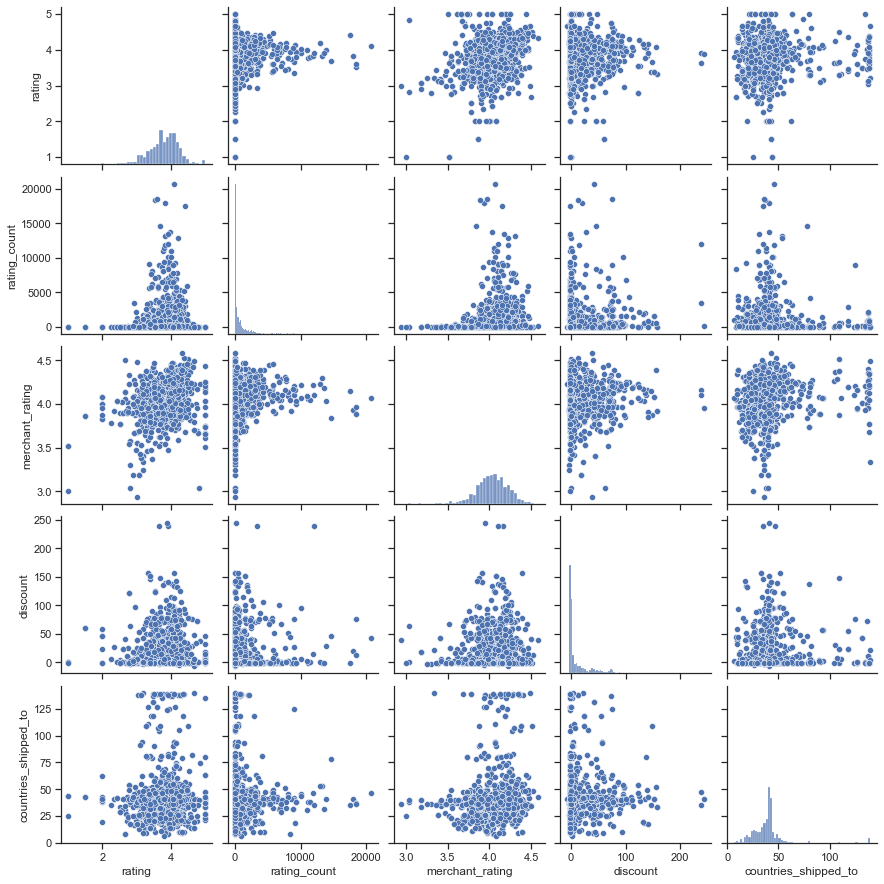

In [149]:
cols1 = ['rating', 'rating_count', 'merchant_rating', 'discount', 'countries_shipped_to']

df_cols1 = df[cols1]
sns.pairplot(df_cols1);
plt.savefig('scatterplot_relation_rating_1.png')

In [58]:
cols2 = ['rating', 'badges_count', 'badge_local_product', 'badge_product_quality',
        'badge_fast_shipping']
df_cols2 = df[cols2]

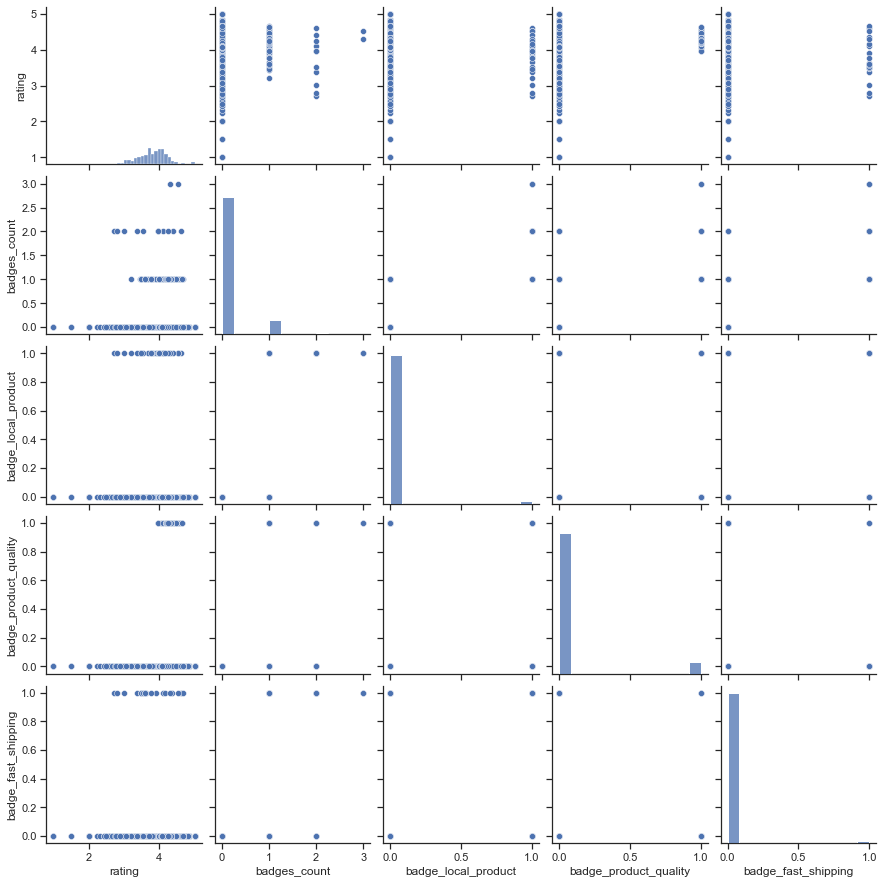

In [150]:
sns.pairplot(df_cols2);
plt.savefig('scatterplot_relation_rating_2.png')

- **Scatter Graphs — a closer look at Relationship to Rating**

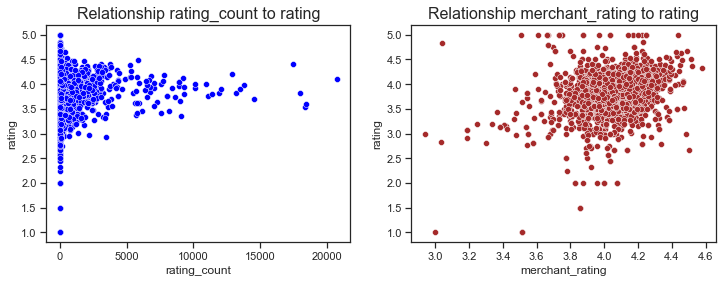

In [151]:
fig, axs = plt.subplots(1,  2, figsize = (12, 4))
sns.scatterplot(data=df, x = 'rating_count', y = 'rating', ax = axs[0], color = 'blue')
sns.scatterplot(data=df, x = 'merchant_rating', y = 'rating', ax = axs[1], color = 'brown')
axs[0].set_title("Relationship rating_count to rating", size = 16)
axs[1].set_title("Relationship merchant_rating to rating", size = 16)
fig.savefig('scatterplot_rating1.png')

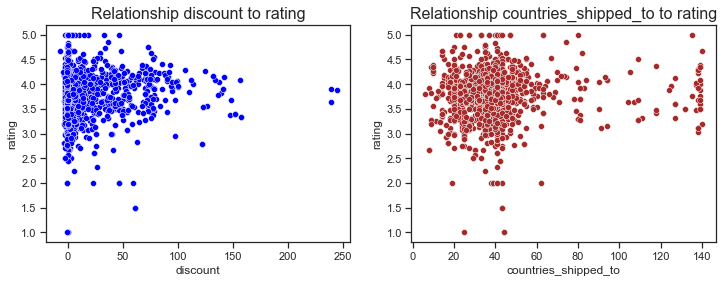

In [152]:
fig, axs = plt.subplots(1,  2, figsize = (12, 4))
sns.scatterplot(data=df, x = 'discount', y = 'rating', ax = axs[0], color = 'blue')
sns.scatterplot(data=df, x = 'countries_shipped_to', y = 'rating', ax = axs[1], color = 'brown')
axs[0].set_title("Relationship discount to rating", size = 16)
axs[1].set_title("Relationship countries_shipped_to to rating", size = 16)
fig.savefig('scatterplot_rating2.png')

- There is some **correlation** for **rating** with **badge_product_quality** & **badges_count** & **merchant_rating**, 

- **Scatterplot and Regression** to show their relationship with rating 

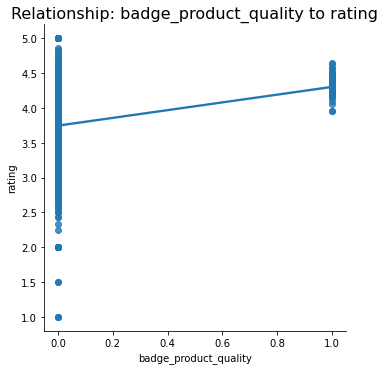

In [62]:
# Relationship badge_product_quality to rating with whole DataFrame

sns.lmplot(x = 'badge_product_quality', y = 'rating', data=df)
ax = plt.gca()
ax.set_title("Relationship: badge_product_quality to rating", size = 16);

- There are not so many Products with Badge "Product Quality" (114 out of 1382), so it does not show us much

In [63]:
df.loc[df['badge_product_quality'] == 0, 'product_id'].count()

1382

In [64]:
df.loc[df['badge_product_quality'] == 1, 'product_id'].count()

114

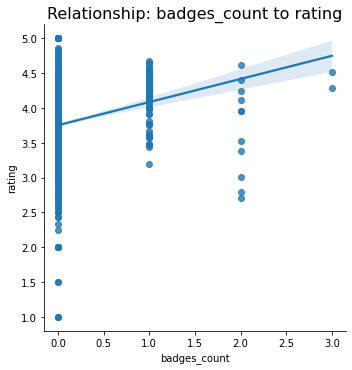

In [65]:
# Relationship badges_count to rating with whole DataFrame
sns.lmplot(x = 'badges_count', y = 'rating', data=df)
ax = plt.gca()
ax.set_title("Relationship: badges_count to rating", size = 16);

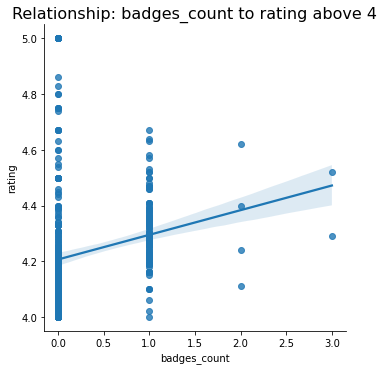

In [66]:
# Relationship badges_count to rating for rating above 4
sns.lmplot(x = 'badges_count', y = 'rating', data=df_high_rating)
ax = plt.gca()
ax.set_title("Relationship: badges_count to rating above 4", size = 16);

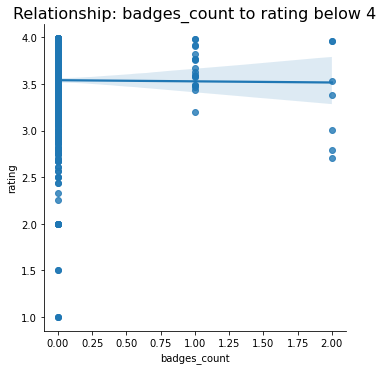

In [67]:
# Relationship badges_count to rating for rating below 4
sns.lmplot(x = 'badges_count', y = 'rating', data=df_low_rating)
ax = plt.gca()
ax.set_title("Relationship: badges_count to rating below 4", size = 16);

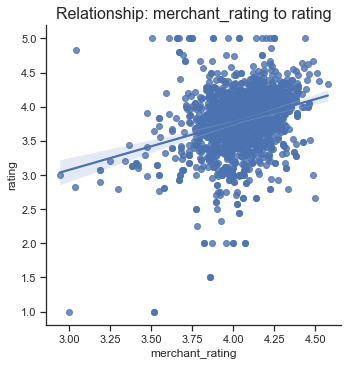

In [153]:
# Relationship merchant_rating to rating for whole DataFrame
sns.lmplot(x = 'merchant_rating', y = 'rating', data=df)
ax = plt.gca()
ax.set_title("Relationship: merchant_rating to rating", size = 16);
fig.savefig('Relationship_merchant_rating to rating.png')

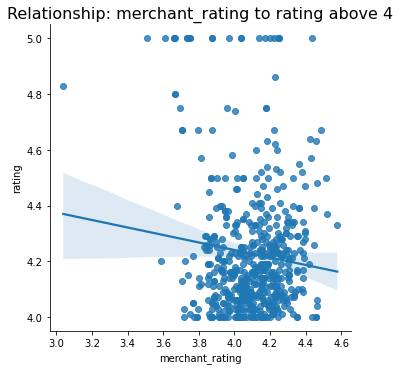

In [69]:
# Relationship merchant_rating to rating for rating 4 and above
sns.lmplot(x = 'merchant_rating', y = 'rating', data=df_high_rating)
ax = plt.gca()
ax.set_title("Relationship: merchant_rating to rating above 4", size = 16);

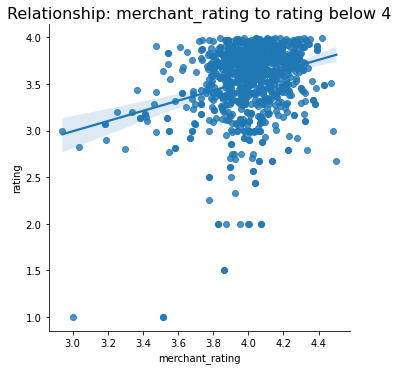

In [70]:
# Relationship merchant_rating to rating for rating below 4
sns.lmplot(x = 'merchant_rating', y = 'rating', data=df_low_rating)
ax = plt.gca()
ax.set_title("Relationship: merchant_rating to rating below 4", size = 16);

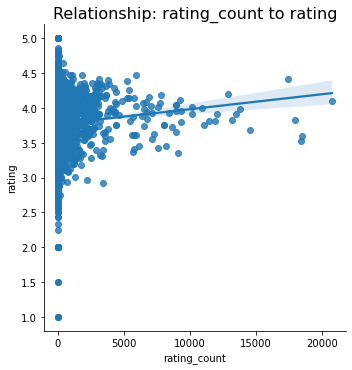

In [71]:
# Relationship rating_count to rating for whole DF
sns.lmplot(x = 'rating_count', y = 'rating', data=df)
ax = plt.gca()
ax.set_title("Relationship: rating_count to rating", size = 16);

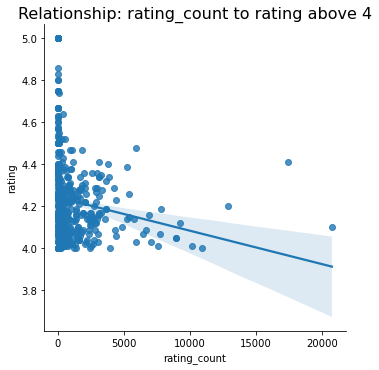

In [72]:
# Relationship rating_count to rating above 4
sns.lmplot(x = 'rating_count', y = 'rating', data=df_high_rating)
ax = plt.gca()
ax.set_title("Relationship: rating_count to rating above 4", size = 16);

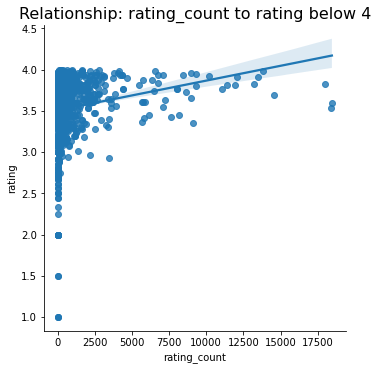

In [73]:
# Relationship rating_count to rating below 4
sns.lmplot(x = 'rating_count', y = 'rating', data=df_low_rating)
ax = plt.gca()
ax.set_title("Relationship: rating_count to rating below 4", size = 16);

## 4.2. Analyzing relationships using logarithms:

In [155]:
df['rating_log'] = np.log2(df['rating'])

In [156]:
df['badge_product_quality_log'] = np.log2(df['badge_product_quality'])

C:\Users\justj\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [157]:
df['merchant_rating_log'] = np.log2(df['merchant_rating'])

In [158]:
df['rating_count_log'] = np.log2(df['rating_count'])

In [159]:
sns.set_palette("deep")

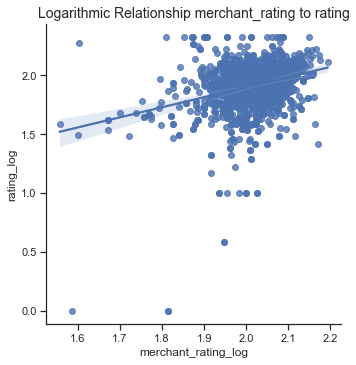

In [162]:
# Logarithmic Relationship merchant_rating to rating
sns.lmplot(x = 'merchant_rating_log', y = 'rating_log', data=df)
ax = plt.gca()
ax.set_title("Logarithmic Relationship merchant_rating to rating", size = 14);
fig.savefig('Log_Relationship_merchant_rating to rating.png')

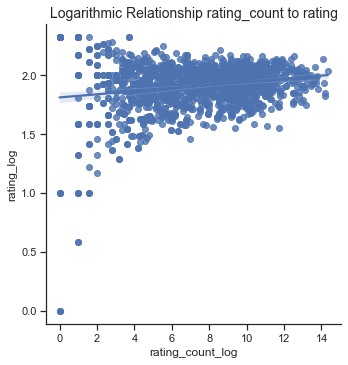

In [163]:
# Logarithmic Relationship merchant_rating to rating
sns.lmplot(x = 'rating_count_log', y = 'rating_log', data=df);
ax = plt.gca()
ax.set_title("Logarithmic Relationship rating_count to rating", size = 14);
fig.savefig('Log_Relationship rating_count to rating.png')

#### When trying to make a Linear Regression shows an error due to Columns with logarithms, so we delete the columns with log now

In [164]:
df = df.drop('rating_log', axis = 1)

In [165]:
df = df.drop('badge_product_quality_log', axis = 1)

In [166]:
df = df.drop('merchant_rating_log', axis = 1)

In [167]:
df = df.drop('rating_count_log', axis = 1)

# 5. Multiple Linear Regression

In [168]:
df.columns

Index(['title_orig', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_color', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'has_urgency_banner',
       'origin_country', 'merchant_title', 'merchant_rating_count',
       'merchant_rating', 'merchant_id', 'merchant_has_profile_picture',
       'product_id', 'rating_range', 'discount'],
      dtype='object')

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

 - **Since there was a slight correlation of rating with badge_product_quality, we can try using it as variables first**

In [89]:
# Get X and Y
columns = ['badge_product_quality', 'merchant_rating', 'badges_count']
y = df['rating'] 
X = df[columns]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1496, 3)
(1496,)
(1196, 3)
(1196,)
(300, 3)
(300,)


In [92]:
# Create a linear regression variable
model = LinearRegression()

In [93]:
model.fit(X_train, y_train)

LinearRegression()

In [94]:
model.intercept_

1.744251526983788

In [95]:
model.coef_

array([ 0.56587422,  0.49830522, -0.08027261])

## 5.1 Insights:
**Our model would be the following:**
$rating = 1.744 + 0.566 * badge.product.quality + 0.498 * merchant.rating - 0.08 * badges.count$

1. A product having **badge "product quality"** (1 or 0, i.e. 'Yes' or 'No') might increase **rating of a product** by 0.557, given other variables stay the same. Badge "product quality" contributes to higher rating, possibly, as on Wish platform the quality badge is given to a product when most buyers rate quality aspect of rating positively.

2. Also, increase in **merchant rating** increases product rating by a factor of 0.498. Merchant rating also has positive relationship, presumably because when buyer rates products they purchased from a merchant, the merchant ratings also is better rated.

3. And, apparently, increase in **badge count** decreases the product rating by a factor of 0.08. Due to small amount of data, there are only 148 Products out of 1496 with badge count more than 0. As shown below, Products with badge count 2 are fewer than with 1, and there are even fewer with 3 badges, which explains a negative dependency between badge count and rating in our model.

In [96]:
df['badges_count'].value_counts().sort_index()

0    1348
1     135
2      11
3       2
Name: badges_count, dtype: int64

In [97]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
badge_product_quality,0.565874
merchant_rating,0.498305
badges_count,-0.080273


In [98]:
X_test

,badge_product_quality,merchant_rating,badges_count
952,0,4.302082,0
1416,0,3.939482,0
1103,0,3.952836,0
549,0,4.213422,0
530,1,4.274866,1
...,...,...,...
1140,0,3.768046,0
1323,0,3.965388,0
674,0,4.031250,0
611,0,3.982400,0


## 5.2 Predicting with test group:

In [99]:
predictions = model.predict(X_test)

In [100]:
# Try it with a 1st Product in Test Group that does not have a badge "Product Quality":

In [101]:
print("Test group 1st product actual rating:", y_test.iloc[0])
print("Test group 1st product predicted rating:", predictions[0])

Test group 1st product actual rating: 3.83
Test group 1st product predicted rating: 3.8880015387185973


In [102]:
# Try it with a 5th Product in Test Group that has badge "Product Quality":

In [103]:
print("Test group 1st product badge_product_quality (1= 'Yes', 0 = 'No'):", X_test.iloc[4, 0])
print("Test group 1st product actual rating:", y_test.iloc[4])
print("Test group 1st product predicted rating:", predictions[4])

Test group 1st product badge_product_quality (1= 'Yes', 0 = 'No'): 1
Test group 1st product actual rating: 4.06
Test group 1st product predicted rating: 4.360041138345399


In [104]:
# Check the relationship between the actual and predicted ratings: 

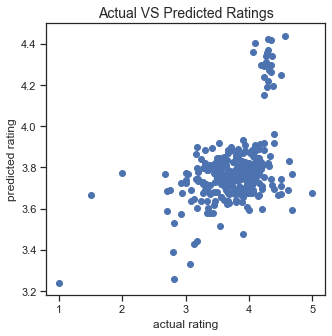

In [105]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

#Scatterplot

ax.scatter(x=y_test, y=predictions)

ax.set_title("Actual VS Predicted Ratings", size = 14)
ax.set_xlabel("actual rating")
ax.set_ylabel("predicted rating");

In [106]:
from sklearn.metrics import r2_score

In [107]:
r2_score(y_test, predictions)

0.20316588198685315

### R. Square for Model 1

Since R Square is ~ 0.2, this means that according to our model: **independent variables X ('badge_product_quality', 'merchant_rating', 'badges_count') explain about ~ 20% of change in y (rating)**

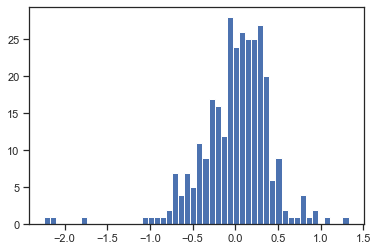

In [108]:
# Residuals
residuals = y_test - predictions
plt.hist(residuals, bins=50);

## 5.3 Analysis of Variable Dependency for Model 1

In [109]:
import statsmodels.formula.api as smf

In [110]:
# Ordinary Least Squares

model = smf.ols(formula='rating ~ badge_product_quality + merchant_rating + badges_count', data=df).fit()

In [111]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     87.08
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           6.34e-52
Time:                        02:08:27   Log-Likelihood:                -886.22
No. Observations:                1496   AIC:                             1780.
Df Residuals:                    1492   BIC:                             1802.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.4632      0.239      6.122      0.000       0.994       1.932
badge_product_quality     0.5519      0.071      7.792      0.000       0.413       0.691
merchant_rating           0.5681      0.059      9.569      0.000       0.452       0.685
badges_count             -0.0795      0.055     -1.456      0.146      -0.187       0.028
==============================================================================
Omnibus:                      233.190   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1143.108
Skew:                          -0.640   Prob(JB):                    5.99e-249
Kurtosis:                       7.086   Cond. No.                         90.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### P-test for Model 1

For all variables **(except for badges count)**, P-value is low, that means that there is a statistically significant dependency of independent variables and our dependent variable 'rating'.

For **badges count** variable, P—value of 0.146 is higher than 0.05, its the dependency is statistically insignificant. 

We will try creating another model with more variables before we decide to dismiss badges count from our model.

## 5.4 Adding more independent variables (Model 2)

In [112]:
# Get X and Y
columns = ['badge_product_quality', 'merchant_rating', 'badges_count',
           'countries_shipped_to', 'discount', 'uses_ad_boosts', 
           'badge_local_product', 'badge_fast_shipping', 'has_urgency_banner']
y = df['rating'] 
X = df[columns]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1496, 9)
(1496,)
(1196, 9)
(1196,)
(300, 9)
(300,)


In [115]:
# Create a linear regression variable
model2 = LinearRegression()

In [116]:
model2.fit(X_train, y_train)

LinearRegression()

In [117]:
model2.intercept_

1.8142704670341747

In [118]:
model2.coef_

array([ 4.06064946e-01,  4.84121185e-01,  7.93689095e-02,  3.45124533e-04,
        1.49562099e-04, -4.71887361e-02, -1.09274973e-01, -2.17421064e-01,
       -2.83655267e-02])

In [119]:
coeff_df_2 = pd.DataFrame(model2.coef_, X.columns, columns=['Coefficients'])
coeff_df_2

,Coefficients
badge_product_quality,0.406065
merchant_rating,0.484121
badges_count,0.079369
countries_shipped_to,0.000345
discount,0.000150
uses_ad_boosts,-0.047189
badge_local_product,-0.109275
badge_fast_shipping,-0.217421
has_urgency_banner,-0.028366


## 5.5 Model 2

Our new model now looks like this:

$rating = 1.814 + 0.406 * badge.product.quality + 0.484 * merchant.rating + 0.08 * badges.count — 0.047 * uses.ad.boosts — 0.109 * badge.local.product — 0.217 * badge.fast.shipping — 0.028 * has.urgency.banner$

Having a **badge "product quality"** (1 or 0, i.e. 'Yes' or 'No') might increase **rating of a product** by 0.406, given that other variables stay the same.

Given that other selected variables stay the same, increase in **merchant rating** increases product rating by a factor of 0.484.

Given that other selected variables stay the same, an increase in **badge count** increases the product rating by a factor of ~ 0.08.

At the same time, variables, such as when product **uses_ad_boosts** or **has_urgency_banner** decrease the rating.

Though variables **badge_local_product**, **badge_fast_shipping** also decrease the rating, there are **very few products** that **have badges "fast shipping"** and **"local product"**, which explains the **negative coefficient**.

We have dismissed factors, such as **countries_shipped_to** and **discount** have very low coefficients which have **little effect on rating**. Even if there would be 200 countries shipped to, or a maximum discount of 244 EUR (the largest in the dataset), the rating will change only very slightly.

In [120]:
df['uses_ad_boosts'].value_counts().sort_index()

0    844
1    652
Name: uses_ad_boosts, dtype: int64

In [121]:
df['has_urgency_banner'].value_counts().sort_index() 

0.0    1041
1.0     455
Name: has_urgency_banner, dtype: int64

In [122]:
df['badge_local_product'].value_counts().sort_index()

0    1467
1      29
Name: badge_local_product, dtype: int64

In [123]:
df['badge_fast_shipping'].value_counts().sort_index()

0    1476
1      20
Name: badge_fast_shipping, dtype: int64

In [124]:
X_test

,badge_product_quality,merchant_rating,badges_count,countries_shipped_to,discount,uses_ad_boosts,badge_local_product,badge_fast_shipping,has_urgency_banner
952,0,4.302082,0,53,-1.00,0,0,0,0.0
1416,0,3.939482,0,42,0.00,1,0,0,1.0
1103,0,3.952836,0,24,-0.83,0,0,0,1.0
549,0,4.213422,0,28,20.07,0,0,0,0.0
530,1,4.274866,1,48,13.00,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
1140,0,3.768046,0,35,11.00,1,0,0,0.0
1323,0,3.965388,0,9,-1.00,0,0,0,0.0
674,0,4.031250,0,18,134.00,0,0,0,0.0
611,0,3.982400,0,30,-1.00,0,0,0,0.0


## 5.6 Predicting with test group:

In [125]:

predictions2 = model2.predict(X_test)

In [126]:
print("Test group 1st product actual rating:", y_test.iloc[0])
print("Test group 1st product predicted rating:", predictions2[0])

Test group 1st product actual rating: 3.83
Test group 1st product predicted rating: 3.915141640619418


In [127]:
# Try it with a 5th Product in Test Group that has badge "Product Quality":

In [128]:
print("Test group 1st product badge_product_quality (1= 'Yes', 0 = 'No'):", X_test.iloc[4, 0])
print("Test group 1st product actual rating:", y_test.iloc[4])
print("Test group 1st product predicted rating:", predictions[4])

Test group 1st product badge_product_quality (1= 'Yes', 0 = 'No'): 1
Test group 1st product actual rating: 4.06
Test group 1st product predicted rating: 4.360041138345399


In [129]:
from sklearn.metrics import r2_score

In [130]:
r2_score(y_test, predictions2)

0.20339088985778075

### R. Square for Model 2
With the new model, R Square has remained same ~ 0.2, meaning that the variables that we added to our new model **— 'countries_shipped_to',  'discount', 'uses_ad_boosts',  'badge_local_product',  'badge_fast_shipping',  'has_urgency_banner' —** have not significantly changed our model. 

New model still explains only ~ 20% of change in y (rating)

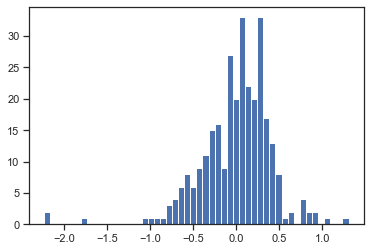

In [131]:
# Residuals
residuals = y_test - predictions2
plt.hist(residuals, bins=50);

## 5.7 Analysis of Variable Dependency for Model 2

In [132]:
import statsmodels.formula.api as smf

In [133]:
# Ordinary Least Squares

model2 = smf.ols(formula='rating ~ badge_product_quality + merchant_rating + badges_count + countries_shipped_to + discount + uses_ad_boosts + badge_local_product + badge_fast_shipping + has_urgency_banner', data=df).fit()

In [134]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     33.49
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           8.10e-49
Time:                        02:08:28   Log-Likelihood:                -883.00
No. Observations:                1496   AIC:                             1784.
Df Residuals:                    1487   BIC:                             1832.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.5190      0.240      6.320      0.000       1.048       1.990
badge_product_quality     0.3920      0.043      9.035      0.000       0.307       0.477
merchant_rating           0.5578      0.060      9.276      0.000       0.440       0.676
badges_count              0.0809      0.030      2.722      0.007       0.023       0.139
countries_shipped_to      0.0003      0.001      0.564      0.573      -0.001       0.001
discount                  0.0001      0.000      0.387      0.699      -0.001       0.001
uses_ad_boosts           -0.0404      0.023     -1.764      0.078      -0.085       0.005
badge_local_product      -0.1648      0.081     -2.025      0.043      -0.324      -0.005
badge_fast_shipping      -0.1464      0.090     -1.623      0.105      -0.323       0.031
has_urgency_banner       -0.0402      0.025     -1.632      0.103      -0.089       0.008
==============================================================================
Omnibus:                      233.913   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1139.221
Skew:                          -0.645   Prob(JB):                    4.18e-248
Kurtosis:                       7.076   Cond. No.                     6.10e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.52e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### P-test for Model 2

After making P-test, we can see that P-values for some of the factors are quite high: 

We were right to dismiss the variables **countries_shipped_to** and **discount** that have high P-values (0.573 & 0.699), which means there is no dependency between each variable and **rating**.

Also, variables **badge_fast_shipping**, **has_urgency_banner** and **uses_ad_boosts** have  P-values (0.105 & 0.103 & 0.078), higher than 0.05, which means their dependency on **rating** is statistically insignificant, so we can remove from the model.

At the same time, **badge_local_product** has P-value 0.043, which is lower than 0.05, and is statistically significant dependency. We keep it in in our model. 

Now, our model would look like this:

$Rating = 1.814 + 0.406 * Badge.product.quality + 0.484 * Merchant.rating + 0.08 * Badges.count — 0.109 * Badge.local.product$

# 6. Conclusions 

Based on our model, we can state the following insights that may be useful, when a seller wants to increase rating of products they are selling:


- Having a **badge "product quality"** (1 or 0 / 'Yes' or 'No') might increase **rating of a product** by 0.406, given that other variables stay the same. Badge "product quality" contributes to higher rating, possibly, as on Wish platform the quality badge is given to a product when most buyers rate quality aspect of rating positively.


- Given that other selected variables stay the same, increase in **merchant rating** increases product rating by a factor of 0.484. Merchant rating has positive relationship with rating, presumably, because when buyer rates products they purchased from a merchant with a high rating, the rating of a merchant is also better rated.


- Given that other selected variables stay the same, an increase in **badge count** increases the product rating by a factor of ~ 0.08. Due to small amount of data, there are only 148 Products out of 1496 with badge count more than 0.  


- Interestingly, though badge **local product** is there to appeal to customer as a locally-made product, products with such badge have a negative influence on product rating, at least according to our model. Perhaps, this is due to **Omitted Variable Bias**, as it is possible that some important variables have not been included and would change the model.


- **Functional Misspecification:** since I have used **Multiple Linear Regression**, when this dataset has both numerical variables (such as 'rating' and 'price') as well as categorical variables (with values 'Yes' or 'No' in the form of '1' and '0'), perhaps a different kind of regression could be used?